In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

In [2]:
#FUNCIÓN PARA CALCULAR DISTANCIAS ENTRE EL MISMO ARREGLO
def dis_prop(x):
    dis = []
    n = 0
    for ii in x:
        M = np.linalg.norm(ii-x[n:],axis=1)
        dis.extend(M[M!=0])
        n = n+1
    return np.array(dis)

In [3]:
#FUNCIÓN PARA CALCULAR DISTANCIAS ENTRE ARREGLOS DIFERENTES
def dis_DR(x,y):
    dis = []
    for ii in x:
        M = np.linalg.norm(ii-y,axis=1)
        dis.extend(M)
    return np.array(dis)

In [4]:
#FUNCIÓN DE CORRELACIÓN Peebles-Hauser
def correl_PH(p,p_r,bn):
    
    DD = dis_prop(p)
    nD = len(DD)
    RR = dis_prop(p_r)
    nR = len(RR)
    
    rD = np.linspace(0,np.max(DD),bn)
    rR = np.linspace(0,np.max(RR),bn)
    
    eps = []
    
    for i in range(bn-1):
        NDD = len(DD[(DD >= rD[i]) & (DD <= rD[i+1])])
        NRR = len(RR[(RR >= rR[i]) & (RR <= rR[i+1])])
        eps.append((nR*NDD/(nD*NRR))-1)
        
    return rD[:bn-1],np.array(eps)

In [5]:
#FUNCIÓN DE CORRELACIÓN Landy-Szalay
def correl_LS(p,p_r,bn):
    
    DD = dis_prop(p)
    nD = len(DD)
    RR = dis_prop(p_r)
    nR = len(RR)
    DR = dis_DR(p,p_r)
    nDR = len(DR)
    
    rD = np.linspace(0,np.max(DD),bn)
    rR = np.linspace(0,np.max(RR),bn)
    rDR = np.linspace(0,np.max(DR),bn)
    
    eps = []
    
    for i in range(bn-1):
        NDD = len(DD[(DD >= rD[i]) & (DD <= rD[i+1])])
        NRR = len(RR[(RR >= rR[i]) & (RR <= rR[i+1])])
        NDR = len(DR[(DR >= rDR[i]) & (DR <= rDR[i+1])])
        eps.append(1 + NDD*nR/(nD*NRR) - 2*NDR*nR/(nDR*NRR))
        
    return rD[:bn-1],np.array(eps)

In [6]:
path = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana_13/result.csv'
data  = pd.read_csv(path)

In [7]:
obj = np.zeros_like(data['type'])

In [16]:
obj[data['type'] == 'PSF'] = 1
obj[data['type'] == 'REX'] = 2
obj[data['type'] == 'DEV'] = 3
obj[data['type'] == 'EXP'] = 4
obj[data['type'] == 'COMP'] = 5

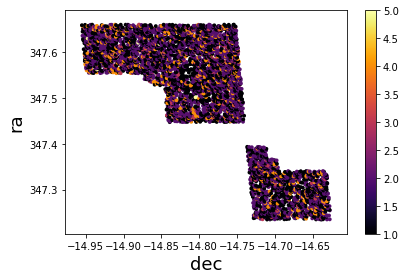

In [17]:
plt.scatter(data.dec, data.ra, label=None,
            c = obj, s = 15, cmap='inferno', linewidth=0, alpha=1)
plt.xlabel('dec',fontsize=18)
plt.ylabel('ra',fontsize=18)
plt.colorbar();
plt.tight_layout()
plt.show()

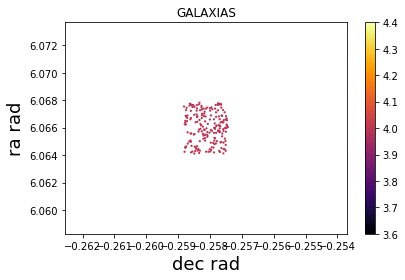

In [18]:
dec_gx = data.dec[(data.dec < -14.75)&(data.dec > -14.83)&(obj == 4)]*(np.pi/180)
ra_gx = data.ra[(data.dec < -14.75)&(data.dec > -14.83)&(obj == 4)]*(np.pi/180)

plt.scatter(dec_gx, ra_gx, label=None,
            c = obj[(data.dec < -14.75)&(data.dec > -14.83)&(obj == 4)], s = 5, cmap='inferno', linewidth=0, alpha=1)
plt.xlabel('dec rad',fontsize=18)
plt.ylabel('ra rad',fontsize=18)
plt.title('GALAXIAS')
plt.colorbar();
plt.tight_layout()
plt.show()

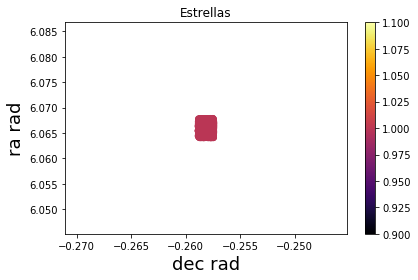

In [24]:
dec_st = data.dec[(data.dec < -14.75)&(data.dec > -14.83)&(obj == 1)]*(np.pi/180)
ra_st = data.ra[(data.dec < -14.75)&(data.dec > -14.83)&(obj == 1)]*(np.pi/180)

plt.scatter(dec_st, ra_st, label=None,
            c = obj[(data.dec < -14.75)&(data.dec > -14.83)&(obj == 1)], s = 55, cmap='inferno', linewidth=0, alpha=1)
plt.xlabel('dec rad',fontsize=18)
plt.ylabel('ra rad',fontsize=18)
plt.title('Estrellas')
plt.colorbar();
plt.tight_layout()
plt.show()

In [25]:
xdata_gx = np.cos(ra_gx)*np.sin(dec_gx)
ydata_gx = np.sin(ra_gx)*np.sin(dec_gx)
zdata_gx = np.cos(dec_gx)

xdata_st = np.cos(ra_st)*np.sin(dec_st)
ydata_st = np.sin(ra_st)*np.sin(dec_st)
zdata_st = np.cos(dec_st)

In [31]:
n_gx = len(dec_gx)
x_gx = xdata_gx[:n]
y_gx = ydata_gx[:n]
z_gx = zdata_gx[:n]

n_st= len(dec_st)
x_st = xdata_st[:n]
y_st = ydata_st[:n]
z_st = zdata_st[:n]

In [32]:
U_gx = np.random.uniform(np.cos(np.min(dec_gx[:n])),np.cos(np.max(dec_gx[:n])),n_gx)
ra_rand_gx = np.random.uniform(np.min(ra_gx[:n]),np.max(ra_gx[:n]),n_gx)

x_r_gx = -np.cos(ra_rand_gx)*(1-U_gx**2)**0.5
y_r_gx = -np.sin(ra_rand_gx)*(1-U_gx**2)**0.5
z_r_gx = U_gx

U_st = np.random.uniform(np.cos(np.min(dec_st[:n])),np.cos(np.max(dec_st[:n])),n_st)
ra_rand_st = np.random.uniform(np.min(ra_st[:n]),np.max(ra_st[:n]),n_st)

x_r_st = -np.cos(ra_rand_st)*(1-U_st**2)**0.5
y_r_st = -np.sin(ra_rand_st)*(1-U_st**2)**0.5
z_r_st = U_st

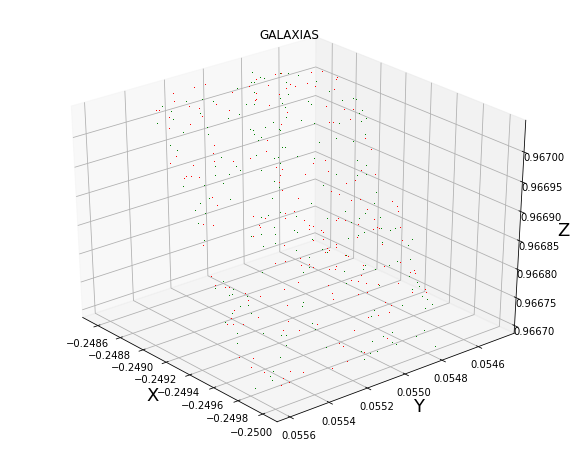

In [33]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(x_gx,y_gx,z_gx,',g')
ax.plot3D(x_r_gx,y_r_gx,z_r_gx,',r')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('GALAXIAS')
ax.view_init(30, 140)
plt.show()

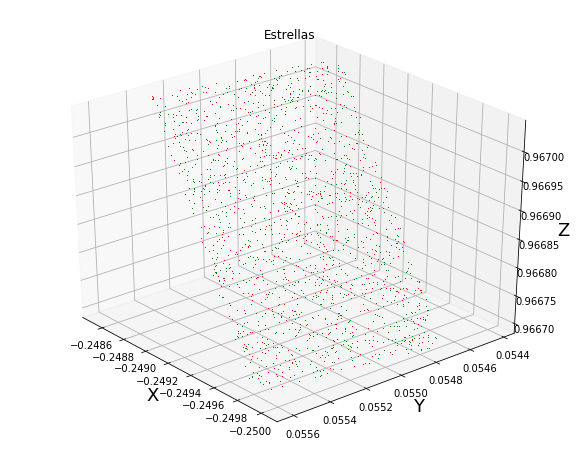

In [34]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(x_st,y_st,z_st,',g')
ax.plot3D(x_r_st,y_r_st,z_r_st,',r')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('Estrellas')
ax.view_init(30, 140)
plt.show()

In [35]:
X_gx = np.array([x_gx,y_gx,z_gx]).T
X_r_gx = np.array([x_r_gx,y_r_gx,z_r_gx]).T

X_st = np.array([x_st,y_st,z_st]).T
X_r_st = np.array([x_r_st,y_r_st,z_r_st]).T

In [70]:
bins = 50
r_PH_gx,eps_PH_gx = correl_PH(X_gx,X_r_gx,bins)
r_LS_gx,eps_LS_gx = correl_LS(X_gx,X_r_gx,bins)

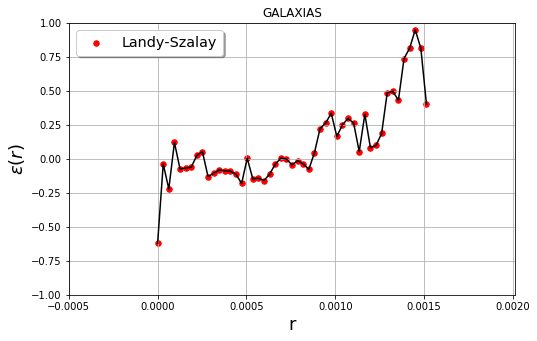

In [71]:
fig = plt.figure(figsize=(8,5))
#plt.scatter(r_PH_gx,eps_PH_gx, s=30, c='g',label='Peebles-Hauser')
plt.scatter(r_LS_gx,eps_LS_gx, s=30, c='r',label='Landy-Szalay')
plt.plot(r_LS_gx,eps_LS_gx,'k-')
#plt.plot(r_PH_gx,eps_PH_gx,'k-')
plt.xlim(np.min(r_LS_gx)-0.0005,np.max(r_LS_gx)+0.0005)
plt.ylim(-1.,1)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.title('GALAXIAS')
plt.legend(shadow=True, fontsize='x-large')
plt.grid();

In [62]:
bins = 50
r_PH_st,eps_PH_st = correl_PH(X_st,X_r_st,bins)
r_LS_st,eps_LS_st = correl_LS(X_st,X_r_st,bins)

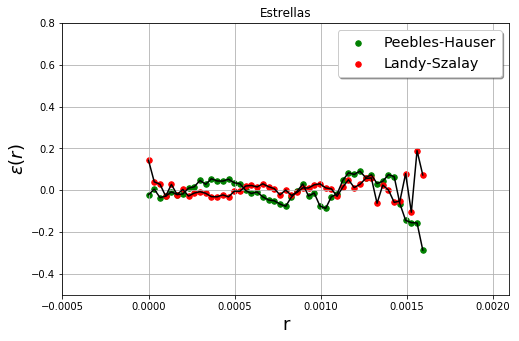

In [63]:
fig = plt.figure(figsize=(8,5))
plt.scatter(r_PH_st,eps_PH_st, s=30, c='g',label='Peebles-Hauser')
plt.scatter(r_LS_st,eps_LS_st, s=30, c='r',label='Landy-Szalay')
plt.plot(r_LS_st,eps_LS_st,'k-')
plt.plot(r_PH_st,eps_PH_st,'k-')
plt.xlim(np.min(r_LS_st)-0.0005,np.max(r_LS_st)+0.0005)
plt.ylim(-0.5,0.8)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.title('Estrellas')
plt.legend(shadow=True, fontsize='x-large')
plt.grid();